/var/folders/v9/0cr7_35s4q7f7g0306ks9xvm0000gn/T/ipykernel_93225/1822975237.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/v9/0cr7_35s4q7f7g0306ks9xvm0000gn/T/ipykernel_93225/1822975237.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Год', y='Количество_проектов', data=df, palette="Blues_r")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Год                  8 non-null      int64 
 1   Количество_проектов  8 non-null      int64 
 2   Общая_сумма          8 non-null      object
 3   Средняя_сумма        8 non-null      object
dtypes: int64(2), object(2)
memory usage: 388.0+ bytes


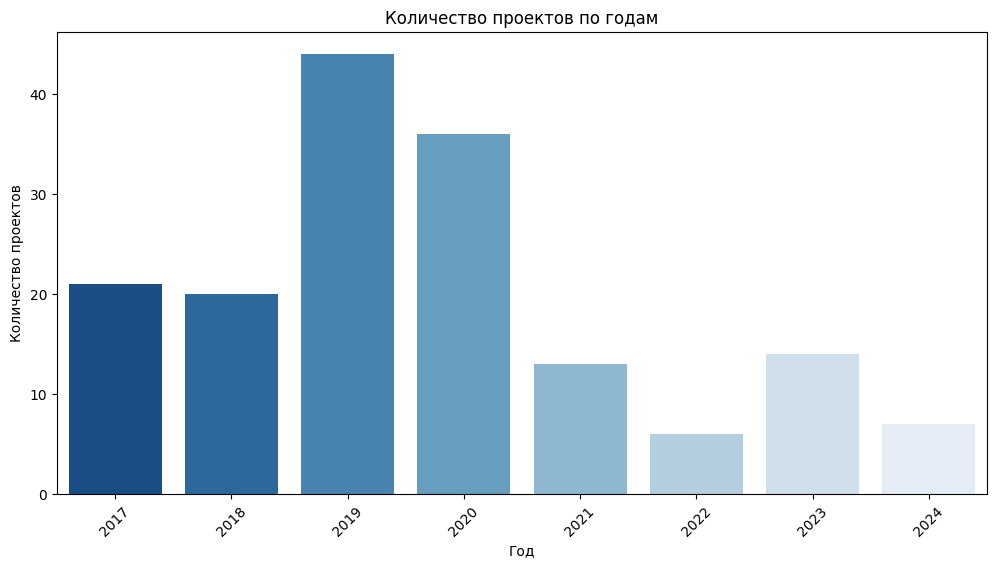

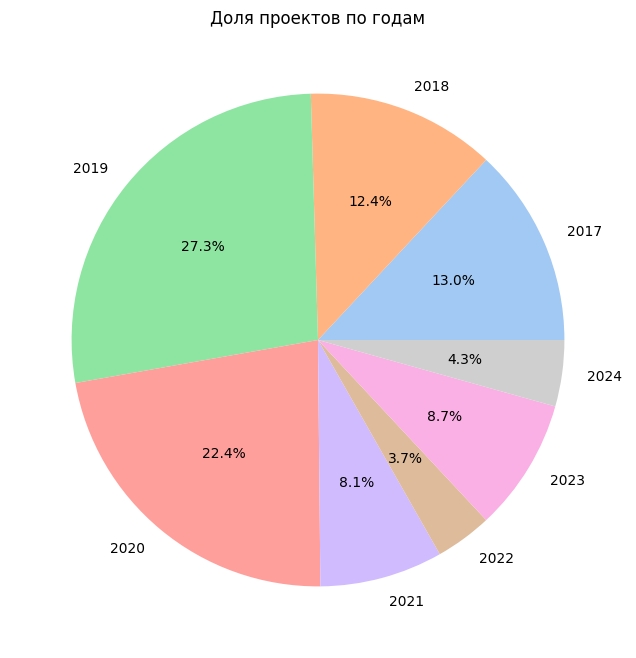

In [2]:
# 1. Импорт библиотек
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Настройки подключения к БД
db_config = {
    'host': 'localhost',
    'database': 'projectsdb',
    'user': 'root',
    'password': 'NewStrongPassword'
}

# 3. Читаем SQL-запрос из файла
query_file = "../sql_queries/7_funding_ranking_by_years.sql"

# 4. Функция для выполнения запроса и загрузки данных
def execute_query(query_file):
    with open(query_file, 'r', encoding='utf-8') as file:
        query = file.read()

    # Подключение к базе данных
    conn = mysql.connector.connect(**db_config)
    
    # Выполнение запроса и загрузка в DataFrame
    df = pd.read_sql(query, conn)
    
    # Закрываем соединение
    conn.close()
    
    return df

# 5. Выполняем запрос и загружаем данные
df = execute_query(query_file)

# 6. Выводим первые строки
df.head()

# 7. Проверяем типы данных
df.info()

# 8. Проверяем статистику
df.describe()

# 9. Визуализация: Количество проектов по годам
plt.figure(figsize=(12, 6))
sns.barplot(x='Год', y='Количество_проектов', data=df, palette="Blues_r")
plt.xticks(rotation=45)
plt.title('Количество проектов по годам')
plt.xlabel('Год')
plt.ylabel('Количество проектов')
plt.show()

# 10. Круговая диаграмма: Доля проектов по годам
plt.figure(figsize=(8, 8))
plt.pie(df['Количество_проектов'], labels=df['Год'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Доля проектов по годам')
plt.show()
